In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. Based on extensive data from an urban freeway near Toronto, Canada, “it is assumed that free speeds can best be represented by a normal distribution” (“Impact of Driver Compliance on the Safety and Operational Impacts of Freeway Variable Speed Limit Systems,” J. of Transp. Engr., 2011: 260–268). The mean and standard deviation reported in the article were 119 km/h and 13.1 km/h, respectively.

#### a. What is the probability that the speed of a randomly selected vehicle is between 100 and 120 km/h?

In [3]:
distribution = scipy.stats.norm(loc=119, scale=13.1)
distribution.cdf(120) - distribution.cdf(100)

0.45694800208998937

#### b. What speed characterizes the fastest 10% of all speeds?


In [4]:
distribution.ppf(0.9)

135.78832550863427

#### c. If five vehicles are randomly and independently selected, what is the probability that at least one car is traveling under the posted speed limit of 100 km/h?

In [15]:
'''
P(at least 1 car under 100 in 5 samples) 
= 1 - P(no car under 100 in 5 samples) 
= 1 - P(car above 100)^5 
= 1 - (1 - CDF(100))^5
'''
1 - (1 - distribution.cdf(100))**5

0.317216158567187

### 2. Daily highs in San Luis Obispo in August are approximately normally distributed with a mean of $76.9 \degree F$. The temperature exceeds 100 degrees Fahrenheit on about 1.5% of August days.

#### a. What can you say about the standard deviation?

In [22]:
'''
MU = 76.9
P(T > 100) = 0.015
Assuming normal distribution, for P((100 - 76.9)/sigma) = 0.015, (100 - 76.9)/sigma = 2.17
Solving, sigma = 
'''

distribution = scipy.stats.norm(loc=0,scale=1)
critical_val = distribution.ppf(1 - 0.015)
SIGMA = (100 - 76.9)/critical_val
SIGMA

10.64471795212127

#### b. Suppose the mean increases by 2 degrees Fahrenheit. By what (multiplicative) factor will the percentage of 100-degree days increase? (The moral of this exercise is: small changes in the mean can have massive effects on the tail probabilities.)

In [27]:
critical_value = (100 - 78.9)/SIGMA
probability_exceeds_100 = 1 - distribution.cdf(critical_value)
probability_exceeds_100 / 0.015

1.5818813164919732

### 3. Suppose that the wrapper of a certain candy bar lists its weight as 2.13 ounces. Naturally, the weights of individual bars vary somewhat. Suppose that the actual weights of these candy bars vary according to a normal distribution with mean $\mu = 2.20$ ounces and standard deviation $\sigma = 0.04$ ounces.

#### a. What proportion of candy bars weigh less than the advertised weight?

In [28]:
distribution = scipy.stats.norm(loc=2.2, scale=0.04)
distribution.cdf(2.13) 

0.040059156863816475

#### b. If the weights of candy bars are independent, what is the expected number of candy bars before you encounter one that weighs less than the advertised weight?

In [33]:
'''
Let X be the number of candy bars picked before encountering one that weighs less than advertised. X follows a Geometric distribution, as covered in section 14. We previously concluded that the PMF of a geometric distribution is given by PMF = p_0^{x-1} * p_1

E(X) = sum_x x . PMF
= 1*p1 + 2*p0*p1 * 3*p0^2*p1
= p1 [1 + 2p0 + 3p0^2 + ...]
= p1 [ (1+p0+p0^2...) + (p0+p0^2+p0^3...) + (p0^2+p0^3+p0^4...)]
= p1 [ 1/1-p0 + p0/1-p0 + p0^2/1-p0 + ...]
= p1/(1-p0) [ 1 + p0 + p0^2 + ...]
= p1/(1-p0) [ 1 / (1-p0)]
= p1/(1-p0)^2 
= p1/p1^2 
= 1/p1
'''

distribution = scipy.stats.norm(loc=2.2, scale=0.04)
1/distribution.cdf(2.13)


24.96308155959349

#### c. If the manufacturer decides that it’s unacceptable to have so many candy bars weigh less than the advertised weight, they might want to adjust the production process so that only 1 candy bar in 1000 weighs less than advertised. What should the mean of the actual weights be (assuming that the standard deviation of the weights remains 0.04 ounces)? Is this more or less than before? Why does this makes sense?

- It is more than before, because the only way to reduce the probability of bars falling below a given weight is to shift the entire curve rightwards on the X axis, assuming the stddev of the distribution doesn't shift

In [47]:
'''
We want P(X < 2.13) = 0.001
P(Z < (2.13 - mu)/0.04) = 0.001
Critical value for this is scipy.stats.norm(0,1).ppf(0.001) = -3.090
Hence (2.13-mu)/0.04 = -3.090
'''
critical_value_target = scipy.stats.norm(0,1).ppf(0.001)
mu = 2.13 - (critical_value_target * 0.04)
print(mu)
# critical_value_of_1over1k = distribution.ppf(0.001)
# critical_value_of_1over1k

2.2536092922467126


#### d. If the manufacturer does not want to add weight to the candy bars (because this costs money), an alternative is to adjust the SD of the weights in the production process. If the mean weight remains at 2.20 ounces but only 1 candy bar in 1000 weighs less than the advertised weight, how small does the standard deviation of the weights need to be? Is this smaller or larger than before? Why does this makes sense?

In [51]:
'''
We want P(X < 2.13) = 0.001
P(Z < (2.13 - 2.2)/sigma) = 0.001
Critical value for this is scipy.stats.norm(0,1).ppf(0.001) = -3.090
Hence (2.13-2.2)= -3.090sigma
'''
critical_value = scipy.stats.norm(0,1).ppf(0.001)
(2.13-2.2)/critical_value

0.022652018704317753

### 4. Let Z be a standard normal random variable. Derive the p.d.f. of $X = e^Z$. Sketch this PDF. Hint: This is a transformation, so you can use the method of Lesson 36. When calculating the c.d.f., leave your answer in terms of $\Phi$, the c.d.f. of the standard normal distribution. It does not have a closed-form expression, but you know its derivative. (What is the derivative of any c.d.f.?). (This distribution has a name: the log-normal distribution. This is a popular distribution for modeling random variables with long right tails, such as income. Hopefully, you can appreciate this if you sketch the p.d.f.)

- From equation, $Z = ln(X)$

$$\begin{align}
    CDF(X) &= P(X \le x) \\
    &= P(e^Z \le x) \\
    &= P(Z \le ln(x)) \\
    &= \frac{1}{\sqrt{2\pi}} \int_{-inf}^{ln(x)} e^{-\frac{z^2}{2}} \\
    &= \Phi(ln(x))
\end{align}$$

$$\begin{align}
    PDF(X) &= CDF'(X) \\
    &= \frac{d(\Phi)}{d(ln(X))} \cdot \frac{d(ln(X))}{d(X)} \\
    &= \frac{d(\Phi)}{d(ln(X))} \cdot \frac{1}{x} \\
    &= PDF(ln(X)) \cdot \frac{1}{x} \\
    &= \frac{1}{x} \cdot \frac{1}{\sqrt{2\pi}} \cdot e^{-0.5 \cdot (ln(X))^2} \\
    &= \frac{1}{x \cdot \sqrt{2\pi}} e^{-\frac{ln(x)^2}{2}} \\
\end{align}$$

/var/folders/sz/cgf6qmyj36bcgkz0rn5dphyw0000gr/T/ipykernel_4130/381876529.py:2: RuntimeWarning: invalid value encountered in log
  retval = (1 / (x * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x)**2)/2)


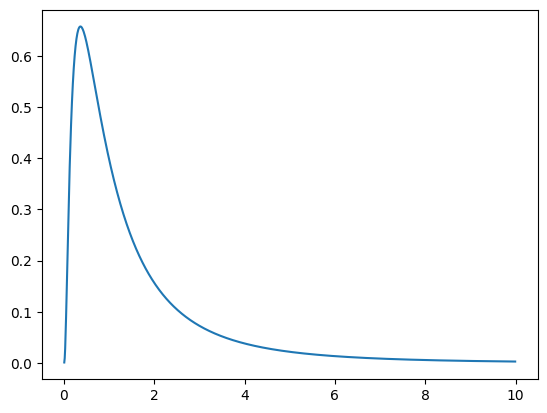

In [57]:
def lognormal(x):
    retval = (1 / (x * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x)**2)/2) 
    return retval

xvals=np.arange(-10,10,0.01)
yvals=lognormal(xvals)
plt.plot(xvals, yvals)